In [5]:
# Importo las librerias que voy a usar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [6]:
# Leo los DF que quiero : Produccion, importacion y exportacion.
impo = pd.read_csv(r'C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\EDA impVexp\acero-importaciones-series.csv')
expo = pd.read_csv(r'C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\EDA impVexp\acero-exportaciones-series.csv')
prod = pd.read_csv(r'C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\EDA impVexp\acero-produccion-series.csv')
consumo = pd.read_csv(r'C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\EDA impVexp\acero-consumo-series.csv')

In [16]:
# Renombro.
prod.rename(columns={'valor':'acero_produccion'},inplace=True)
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,214500
1,1993-02-01,169000
2,1993-03-01,238700
3,1993-04-01,250200
4,1993-05-01,261200


In [19]:
# Renombro columnas.
impo.rename(columns={'acero_moldeado':'Acero_importaciones_acero','barras_forjadas':'Acero_importacion_barras','laminados_largos':'Acero_importacion_laminados_largos','laminados_planos':'Acero_importacion_laminados_planos','rieles':'Acero_importacion_rieles','tubos_con_costura':'Acero_importacion_tubos_con_costura','tubos_sin_costura':'Acero_importacion_sin_costura'},inplace=True)
impo.head()

,indice_tiempo,Acero_importaciones_acero,Acero_importacion_barras,Acero_importacion_laminados_largos,Acero_importacion_laminados_planos,Acero_importacion_rieles,Acero_importacion_tubos_con_costura,Acero_importacion_sin_costura
0,1992-01-01,0.0,0.0,17.7,259.9,0.1,4.0,1.1
1,1992-04-01,0.0,0.0,19.4,246.8,0.0,1.2,3.1
2,1992-07-01,0.0,0.0,24.9,228.7,0.1,3.2,1.8
3,1992-10-01,0.0,0.0,25.5,174.6,0.1,4.1,1.2
4,1993-01-01,0.0,0.0,20.8,112.9,0.0,2.1,1.0


In [22]:
consumo.rename(columns={'laminados_largos':'Acero_consumo_laminados_largos','laminados_planos':'Acero_consumo_laminados_planos','tubos_sin_costura':'Acero_consumo_tubos_sin_costura'},inplace=True)
consumo.head()

,indice_tiempo,Acero_consumo_laminados_largos,Acero_consumo_laminados_planos,Acero_consumo_tubos_sin_costura
0,2008-01-01,438,801,65
1,2008-04-01,524,787,84
2,2008-07-01,465,639,52
3,2008-10-01,423,463,29
4,2009-01-01,426,288,11


In [25]:
expo.rename(columns={'acero_moldeado':'Acero_exportacion_acero','laminados_largos':'Acero_exportacion_laminados_largos','laminados_planos':'Acero_exportacion_laminados_planos','rieles':'Acero_exportacion_rieles','tubos_con_costura':'Acero_exportacion_tubos_con_costura','tubos_sin_costura':'Acero_exportacion_tubos_sin_costura'},inplace=True)
expo.head()

,indice_tiempo,Acero_exportacion_acero,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos,Acero_exportacion_rieles,Acero_exportacion_tubos_con_costura,Acero_exportacion_tubos_sin_costura
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5


In [26]:
prod.acero_produccion = prod.acero_produccion/100

In [27]:
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,2145.0
1,1993-02-01,1690.0
2,1993-03-01,2387.0
3,1993-04-01,2502.0
4,1993-05-01,2612.0


In [32]:
# Tomo el año y lo agrego como valor en columna.
expo.indice_tiempo = pd.to_datetime(expo.indice_tiempo)
expo['year'] = expo.indice_tiempo.dt.year
expo.head()

,indice_tiempo,Acero_exportacion_acero,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos,Acero_exportacion_rieles,Acero_exportacion_tubos_con_costura,Acero_exportacion_tubos_sin_costura,year
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993


In [35]:
# Indico la columna a transformar, creo columna año.
expo.indice_tiempo = pd.to_datetime(expo.indice_tiempo)
expo['year'] = expo.indice_tiempo.dt.year
expo.head()

,indice_tiempo,Acero_exportacion_acero,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos,Acero_exportacion_rieles,Acero_exportacion_tubos_con_costura,Acero_exportacion_tubos_sin_costura,year
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993


In [38]:
# Sumo los valores agrupados por año.
expo_by_year = expo.groupby(['year'])['Acero_exportacion_laminados_largos','Acero_exportacion_laminados_planos'].sum()
expo_by_year.head()

C:\Users\mur_9\AppData\Local\Temp/ipykernel_19596/3191533763.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  expo_by_year = expo.groupby(['year'])['Acero_exportacion_laminados_largos','Acero_exportacion_laminados_planos'].sum()


,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos
year,,
1992,61.0,223.9
1993,99.5,269.6
1994,161.3,295.2
1995,258.8,559.3
1996,226.4,457.4


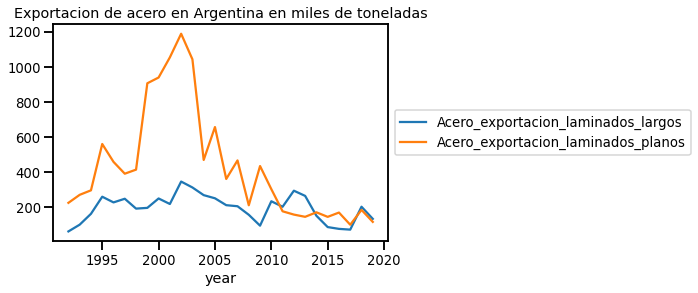

In [40]:
# Comparo Laminados largos y planos.
sns.set_context('talk',font_scale=0.8)
expo_by_year.plot(title='Exportacion de acero en Argentina en miles de toneladas')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

In [44]:
impo.indice_tiempo = pd.to_datetime(impo.indice_tiempo)
impo['year'] = impo.indice_tiempo.dt.year
impo.head()

,indice_tiempo,Acero_importaciones_acero,Acero_importacion_barras,Acero_importacion_laminados_largos,Acero_importacion_laminados_planos,Acero_importacion_rieles,Acero_importacion_tubos_con_costura,Acero_importacion_sin_costura,year
0,1992-01-01,0.0,0.0,17.7,259.9,0.1,4.0,1.1,1992
1,1992-04-01,0.0,0.0,19.4,246.8,0.0,1.2,3.1,1992
2,1992-07-01,0.0,0.0,24.9,228.7,0.1,3.2,1.8,1992
3,1992-10-01,0.0,0.0,25.5,174.6,0.1,4.1,1.2,1992
4,1993-01-01,0.0,0.0,20.8,112.9,0.0,2.1,1.0,1993


In [45]:
impo_by_year = impo.groupby(['year'])['Acero_importacion_laminados_largos','Acero_importacion_laminados_planos'].sum()
impo_by_year.head()



C:\Users\mur_9\AppData\Local\Temp/ipykernel_19596/3018949252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  impo_by_year = impo.groupby(['year'])['Acero_importacion_laminados_largos','Acero_importacion_laminados_planos'].sum()


,Acero_importacion_laminados_largos,Acero_importacion_laminados_planos
year,,
1992,87.5,910.0
1993,113.8,388.7
1994,130.6,371.6
1995,96.5,321.1
1996,155.7,351.3


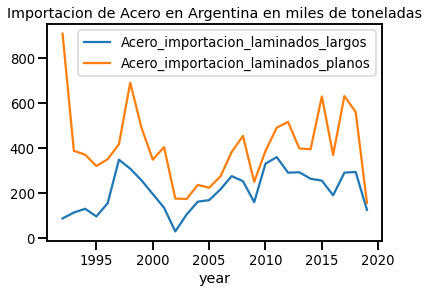

In [46]:
#Graficamos el nuevo dataframe generado "impo_by_year"
impo_by_year.plot(title = "Importacion de Acero en Argentina en miles de toneladas")
plt.show()

In [49]:
expo_and_impo_by_year = pd.concat([expo_by_year,impo_by_year],axis=1,join='inner',)
expo_and_impo_by_year.head()

,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos,Acero_importacion_laminados_largos,Acero_importacion_laminados_planos
year,,,,
1992,61.0,223.9,87.5,910.0
1993,99.5,269.6,113.8,388.7
1994,161.3,295.2,130.6,371.6
1995,258.8,559.3,96.5,321.1
1996,226.4,457.4,155.7,351.3


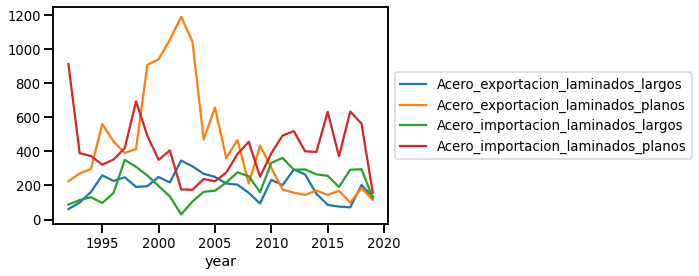

In [51]:
expo_and_impo_by_year.plot()
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [52]:
prod.indice_tiempo = pd.to_datetime(prod.indice_tiempo)
prod['year'] = prod.indice_tiempo.dt.year
prod_by_year = prod.groupby(['year'])['acero_produccion'].sum().to_frame()
prod_by_year.head()

,acero_produccion
year,
1993,28854.00
1994,33050.00
1995,35685.00
1996,40751.00
1997,41698.66


In [53]:
expo_and_impo_by_year = pd.merge(expo_and_impo_by_year,prod_by_year,how='left',left_index=True,right_index=True)
expo_and_impo_by_year.head()

,Acero_exportacion_laminados_largos,Acero_exportacion_laminados_planos,Acero_importacion_laminados_largos,Acero_importacion_laminados_planos,acero_produccion
year,,,,,
1992,61.0,223.9,87.5,910.0,NaN
1993,99.5,269.6,113.8,388.7,28854.0
1994,161.3,295.2,130.6,371.6,33050.0
1995,258.8,559.3,96.5,321.1,35685.0
1996,226.4,457.4,155.7,351.3,40751.0
